In [1]:
## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [3]:
## Reading the file

In [4]:
import pandas as pd
df = pd.read_csv('spam.csv')

In [5]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
df.dtypes

Category    object
Message     object
dtype: object

In [8]:
df[df.isna()].sum()

Category    0
Message     0
dtype: object

In [9]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4827   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [10]:
### creating a column spam

In [11]:
df['spam']=df['Category'].apply(lambda x : 1 if x == 'spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
df.dtypes

Category    object
Message     object
spam         int64
dtype: object

In [13]:
## Splittin the data into train and test

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(df.Message,df.spam,test_size=0.25)

In [15]:
### Using Sklearn CountVectorizer to count the occurence of each unique word

In [16]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
## Bernuallis classification- treated as 1 and 0 i.e. occurences of word 
## multinomial i.e. count of the each word
## gaussian i.e. data  is continuouts under each feature value is different

In [18]:
### creat ign the Mulitnomial Model and trainng it

In [19]:
model = MultinomialNB() 
model.fit(X_train_count,Y_train)

MultinomialNB()

In [20]:
### Testing the model on custom input

In [21]:
emails = ['PFA the timetable for tomorrows test',
        'Hi customer you just won the million dollar through our randomly selected database please give us ur credentials to follow through'
         ]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [22]:
### find the accuracy of the model

In [23]:
x_test_count= v.transform(X_test)
model.score(x_test_count,Y_test)

0.9849354375896701

In [24]:
## Using Pipeline from sklearn Library

In [25]:
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [26]:
## Training the model

In [27]:
clf.fit(X_train,Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [28]:
clf.score(X_test,Y_test)

0.9849354375896701

In [29]:
clf.predict(emails)

array([0, 1], dtype=int64)

In [30]:
### Evaluating model accuracy on testing data set

In [31]:
pred = clf.predict(X_train)
print(classification_report(Y_train, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3625
           1       0.98      0.97      0.97       555

    accuracy                           0.99      4180
   macro avg       0.99      0.98      0.99      4180
weighted avg       0.99      0.99      0.99      4180



<AxesSubplot:>

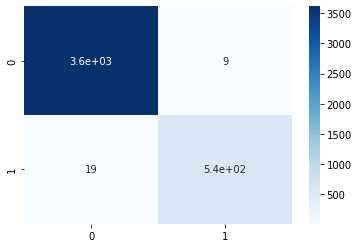

In [32]:
cf_matrix = confusion_matrix(Y_train, pred)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

<AxesSubplot:>

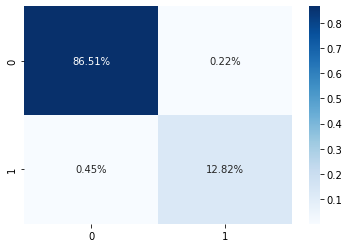

In [33]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [34]:
print("Accuracy:", accuracy_score(Y_train, pred))

Accuracy: 0.9933014354066986
